In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline
path = '/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/Computer vision with python/'

In [12]:
cat4 = cv2.imread(path + 'CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)


type: <class 'numpy.ndarray'>
shape: (375, 500, 3)


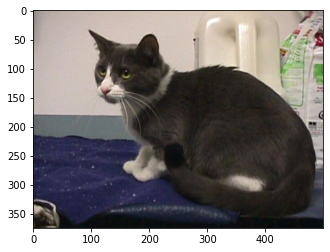

In [14]:
print('type:',type(cat4))
print('shape:',cat4.shape)
plt.imshow(cat4)

### ImageDataGenerator is an object that creates arbitrary image with its set parameters

In [15]:
from keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # shift the pic width by a max of 10%
                               height_shift_range=0.1, # shift the pic height by a max of 10%
                               rescale=1/255, # rescale the image by normalzing it.
                               shear_range=0.2, # shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # zoom in by 20% max
                               horizontal_flip=True, # allo horizontal flipping
                               fill_mode='nearest' # fill in missing pixels with the nearest filled value
                              )

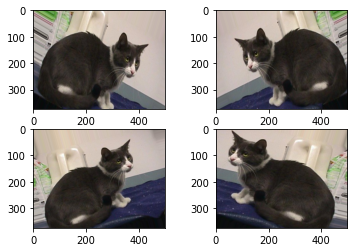

In [22]:
# random_transform method deforms image with its set parameters 
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.imshow(image_gen.random_transform(cat4))

In [51]:
# flow_from_directory makes images under labeled folder as their labels. 
image_gen.flow_from_directory(path+'CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [52]:
image_gen.flow_from_directory(path+'CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


### Since all images have distinct size and shape, resizing images is necessary

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [24]:
# width,height,channels
image_shape = (150,150,3)

In [25]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [29]:
model = Sequential()

# input shape of the layer and the shape of the image should be matched
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

# Last layer must be binary number. 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

### Training the model

In [32]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory(path+'CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

test_image_gen = image_gen.flow_from_directory(path+'CATS_DOGS/test',
                                              target_size = image_shape[:2],
                                              batch_size = batch_size,
                                              class_mode = 'binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [34]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
results = model.fit_generator(train_image_gen, epochs=2,
                             steps_per_epoch=150,
                             validation_data = test_image_gen,
                             validation_steps=12)

Epoch 1/2
150/150 [==============================] - 36s 239ms/step - loss: 0.6934 - accuracy: 0.4996 - val_loss: 0.7104 - val_accuracy: 0.4844
Epoch 2/2
150/150 [==============================] - 34s 226ms/step - loss: 0.6923 - accuracy: 0.5175 - val_loss: 0.6848 - val_accuracy: 0.5104


### It is somtimes better to use pretrained model since training process takes too much time

In [41]:
from keras.models import load_model

In [43]:
new_model = load_model(path+'Computer-Vision-with-Python/06-Deep-Learning-Computer-Vision/cat_dog_100epochs.h5')

### Predicting on new images

In [44]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [46]:
from keras.preprocessing import image

dog_file = path+'CATS_DOGS/train/Dog/2.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))
dog_img = image.img_to_array(dog_img)

# dog_img only consists of three dimension, (width, height, channels)
dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [50]:
prediction_prob = new_model.predict(dog_img)
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.9799569]] 
